# Chemical Data Retrieval Notebook
This notebook aims to facilitate the retrieval and visualization of chemical data from PubChem. It provides functionalities to extract information about the commercial availability of compounds and generate visual representations of molecular structures.

## Functions Overview:
1. search_commercial_availability_pubchem(df):

- This function retrieves commercial availability information for compounds based on their SMILES representations using PubChem API.
- It takes a DataFrame df containing SMILES strings of compounds as input and adds a new column indicating commercial availability.

2. chemical_vendors_links_pubchem(df):

- This function retrieves links to chemical vendors for compounds using PubChem API.
- It takes a DataFrame df containing SMILES strings of compounds as input and adds a new column containing URLs to chemical vendors.

## Workflow:
1. Data Retrieval from PubChem:

- The notebook begins with the extraction of chemical data from PubChem using the search_commercial_availability_pubchem() and chemical_vendors_links_pubchem() functions.

2. DataFrame Generation:

- Once the data is retrieved, a DataFrame is created containing the chemical information, including SMILES representations of compounds.

3. Molecule Visualization:

- The notebook utilizes RDKit to convert the SMILES representations into molecular structures and generate visual representations (images) of the molecules.

4. Data Export:

- Finally, the notebook saves the DataFrame with additional information and molecule images into an Excel file for further analysis or sharing.


By following this notebook, users can efficiently retrieve chemical data from PubChem, visualize molecular structures, and organize the information for downstream analysis.

In [1]:
#@title Install necessary libraries if not already installed
!pip install pandas requests pubchempy rdkit

In [2]:
#@title Import necessary libraries
import pandas as pd
import time
import requests
from IPython.display import clear_output
import pubchempy as pcp
from rdkit import Chem
from rdkit.Chem import PandasTools

In [3]:
def search_commercial_availability_pubchem(df):
    """
    Search for commercial availability of compounds on PubChem.

    Args:
        df (DataFrame): DataFrame containing a column named 'smiles' with SMILES strings of compounds.

    Returns:
        DataFrame: DataFrame with an additional column 'commercial_availability_pubchem' indicating the commercial availability status.
    """
    print("Searching for commercial availability of compounds on PubChem.")
    commercial_availability_list = []
    for i, smiles in enumerate(df["smiles"], start=1):
        clear_output(wait=True)
        print(f"Processing molecule {i}")
        try:
            time.sleep(1)
            molecule_smiles = pcp.get_compounds(smiles, 'smiles')
            print("PubChem Id retrieved")
            cid = molecule_smiles[0].cid
            url = f'https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/categories/compound/{cid}/JSON/?heading=Chemical+Vendors&response_type=save&response_basename=Vendors_CID_{cid}'
            response = requests.get(url)
            print("URL retrieved")
            if response.status_code == 200:
                commercial_availability_list.append("True")
            else:
                commercial_availability_list.append("False")
        except Exception as e:
            print(f"An error occurred: {str(e)}")
            commercial_availability_list.append("False")

    print("Adding results to the table")
    df["commercial_availability_pubchem"] = commercial_availability_list

    print("End of process")
    return df


def chemical_vendors_links_pubchem(df):
    """
    Retrieve links to chemical vendors for compounds on PubChem.

    Args:
        df (DataFrame): DataFrame containing a column named 'smiles' with SMILES strings of compounds.

    Returns:
        DataFrame: DataFrame with an additional column 'commercial_availability_link' containing URLs to chemical vendors.
    """
    print("Retrieving links to chemical vendors for compounds on PubChem.")
    commercial_availability_link_list = []
    for j, smiles in enumerate(df["smiles"], start=1):
        clear_output(wait=True)
        print(f"Processing molecule {j}")
        try:
            time.sleep(2)
            molecule_smiles = pcp.get_compounds(smiles, 'smiles')
            print("PubChem Id retrieved")
            cid = molecule_smiles[0].cid
            url = f'https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/categories/compound/{cid}/JSON/?heading=Chemical+Vendors&response_type=save&response_basename=Vendors_CID_{cid}'
            response = requests.get(url)
            print("URL retrieved")
            if response.status_code == 200:
                url_element = f'https://pubchem.ncbi.nlm.nih.gov/compound/{cid}#section=Chemical-Vendors'
                commercial_availability_link_list.append(url_element)
            else:
                commercial_availability_link_list.append("NA")
        except Exception as e:
            print(f"An error occurred: {str(e)}")
            commercial_availability_link_list.append("NA")

    print("Adding links")
    df["commercial_availability_link"] = commercial_availability_link_list

    print("End of process")
    return df

In [4]:
# Create the DataFrame with molecules
molecules = {
    'smiles': [
        'CCO',  # Ethanol
        'CC(=O)O',  # Acetic acid
        'CN(CC)C(=O)O',  # Pregabalin
        'CC(C)C1=CC=CC=C1',  # Toluene
        'CC1=CC=C(C=C1)C(C)C(=O)O',  # Ibuprofen
        'C1=CC=C2C(=C1)C=CC=C2',  # Styrene
        'C1=CC=C(C=C1)C(=O)O',  # Benzoic acid
        'CC(=O)OCC(CN)N',  # N-Acetylcysteine
        'CC(=O)NC1=CC=CC=C1',  # Acetaminophen
        'C1=CC(=CC=C1C2=CC=CC=C2)N'  # Chlorpheniramine
    ]
}
df = pd.DataFrame(molecules)

In [5]:
# Apply the search_commercial_availability_pubchem() function on the DataFrame
df = search_commercial_availability_pubchem(df)

# Display the DataFrame after applying the first function
print("After applying search_commercial_availability_pubchem():")
df

Processing molecule 10
PubChem Id retrieved
URL retrieved
Adding results to the table
End of process
After applying search_commercial_availability_pubchem():


,smiles,commercial_availability_pubchem
0,CCO,True
1,CC(=O)O,True
2,CN(CC)C(=O)O,True
3,CC(C)C1=CC=CC=C1,True
4,CC1=CC=C(C=C1)C(C)C(=O)O,True
5,C1=CC=C2C(=C1)C=CC=C2,True
6,C1=CC=C(C=C1)C(=O)O,True
7,CC(=O)OCC(CN)N,True
8,CC(=O)NC1=CC=CC=C1,True
9,C1=CC(=CC=C1C2=CC=CC=C2)N,True


In [6]:
# Apply the chemical_vendors_links_pubchem() function on the DataFrame
df = chemical_vendors_links_pubchem(df)

# Display the DataFrame after applying the second function
print("\nAfter applying chemical_vendors_links_pubchem():")
df

Processing molecule 10
PubChem Id retrieved
URL retrieved
Adding links
End of process

After applying chemical_vendors_links_pubchem():


,smiles,commercial_availability_pubchem,commercial_availability_link
0,CCO,True,https://pubchem.ncbi.nlm.nih.gov/compound/702#...
1,CC(=O)O,True,https://pubchem.ncbi.nlm.nih.gov/compound/176#...
2,CN(CC)C(=O)O,True,https://pubchem.ncbi.nlm.nih.gov/compound/1459...
3,CC(C)C1=CC=CC=C1,True,https://pubchem.ncbi.nlm.nih.gov/compound/7406...
4,CC1=CC=C(C=C1)C(C)C(=O)O,True,https://pubchem.ncbi.nlm.nih.gov/compound/1508...
5,C1=CC=C2C(=C1)C=CC=C2,True,https://pubchem.ncbi.nlm.nih.gov/compound/931#...
6,C1=CC=C(C=C1)C(=O)O,True,https://pubchem.ncbi.nlm.nih.gov/compound/243#...
7,CC(=O)OCC(CN)N,True,https://pubchem.ncbi.nlm.nih.gov/compound/1539...
8,CC(=O)NC1=CC=CC=C1,True,https://pubchem.ncbi.nlm.nih.gov/compound/904#...
9,C1=CC(=CC=C1C2=CC=CC=C2)N,True,https://pubchem.ncbi.nlm.nih.gov/compound/7102...


,smiles,commercial_availability_pubchem,commercial_availability_link,mol
0,CCO,True,https://pubchem.ncbi.nlm.nih.gov/compound/702#...,
1,CC(=O)O,True,https://pubchem.ncbi.nlm.nih.gov/compound/176#...,
2,CN(CC)C(=O)O,True,https://pubchem.ncbi.nlm.nih.gov/compound/1459...,
3,CC(C)C1=CC=CC=C1,True,https://pubchem.ncbi.nlm.nih.gov/compound/7406...,
4,CC1=CC=C(C=C1)C(C)C(=O)O,True,https://pubchem.ncbi.nlm.nih.gov/compound/1508...,
5,C1=CC=C2C(=C1)C=CC=C2,True,https://pubchem.ncbi.nlm.nih.gov/compound/931#...,
6,C1=CC=C(C=C1)C(=O)O,True,https://pubchem.ncbi.nlm.nih.gov/compound/243#...,
7,CC(=O)OCC(CN)N,True,https://pubchem.ncbi.nlm.nih.gov/compound/1539...,
8,CC(=O)NC1=CC=CC=C1,True,https://pubchem.ncbi.nlm.nih.gov/compound/904#...,
9,C1=CC(=CC=C1C2=CC=CC=C2)N,True,https://pubchem.ncbi.nlm.nih.gov/compound/7102...,

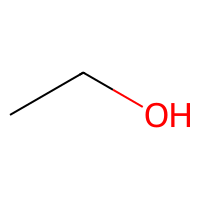
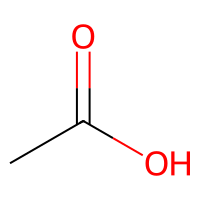
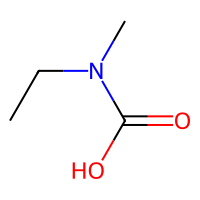
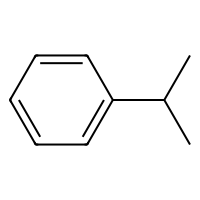
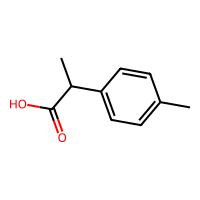
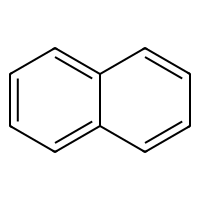
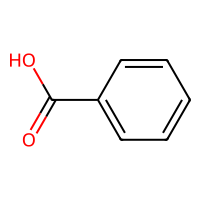
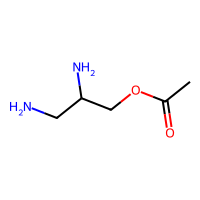
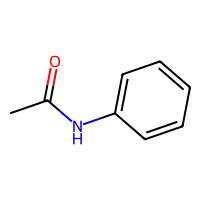
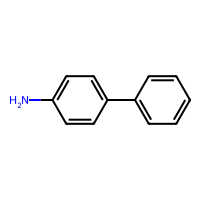

In [7]:
# Convert SMILES to RDKit chemical structures and add molecules to the DataFrame
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='smiles', molCol='mol')
df

In [8]:
# Save the DataFrame with images to an Excel file
df.to_excel("chemical_data.xlsx", index=False)

print(f"File saved as chemical_data.xlsx")

File saved as chemical_data.xlsx
